<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/0623MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test,  y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


5


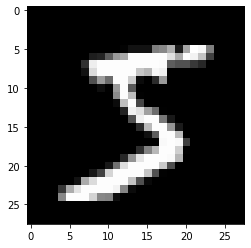

In [3]:
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers =[
  # 784 * 128(線條) + 128(bias) = 100480
  Dense(256, activation="relu", input_dim=784),
  # 128 * 10(線條) + 10(bias) = 1290
  Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
# mse坡度在你預測很差的時候太小了, cross entropy坡度好多了
# 二元(Sigmoid):Binary Cross Entropy   plog(1/q)+ (1-p)log(1/1-q)
# 多元(softmax):Categorical Cross Entropy    pi(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=["accuracy"])

In [7]:
# 資料預處理
# 答案:[0,5,2,3,....]
from tensorflow.keras.utils import to_categorical # One-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 圖片 : [[255, 0 , 255, 128]]
# 28 * 28 -> 784 (攤平)
x_train_norm  = x_train.reshape(60000, 784) / 255
x_test_norm  = x_test.reshape(10000, 784) / 255
# print(x_train_norm[0])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split : 切出一些驗證資料來做驗證(0.1:54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小:200, 圖片大:20)
# 200batch, 10epochs: 54000 * 10 / 200 -> 2700次(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callback = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
model.fit(x_train_norm,
      y_train_cat,
      validation_split=0.1,
      epochs=30,
      batch_size=200,
      verbose=2,
      callbacks=callback)

Epoch 1/30
270/270 - 2s - loss: 0.3749 - accuracy: 0.8963 - val_loss: 0.1598 - val_accuracy: 0.9587
Epoch 2/30
270/270 - 2s - loss: 0.1615 - accuracy: 0.9540 - val_loss: 0.1104 - val_accuracy: 0.9695
Epoch 3/30
270/270 - 2s - loss: 0.1126 - accuracy: 0.9680 - val_loss: 0.0916 - val_accuracy: 0.9733
Epoch 4/30
270/270 - 2s - loss: 0.0861 - accuracy: 0.9754 - val_loss: 0.0811 - val_accuracy: 0.9767
Epoch 5/30
270/270 - 2s - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 6/30
270/270 - 1s - loss: 0.0551 - accuracy: 0.9847 - val_loss: 0.0713 - val_accuracy: 0.9792
Epoch 7/30
270/270 - 2s - loss: 0.0449 - accuracy: 0.9877 - val_loss: 0.0701 - val_accuracy: 0.9788
Epoch 8/30
270/270 - 2s - loss: 0.0366 - accuracy: 0.9900 - val_loss: 0.0675 - val_accuracy: 0.9792
Epoch 9/30
270/270 - 1s - loss: 0.0304 - accuracy: 0.9919 - val_loss: 0.0690 - val_accuracy: 0.9803
Epoch 10/30
270/270 - 1s - loss: 0.0250 - accuracy: 0.9938 - val_loss: 0.0644 - val_accuracy: 0.9817

In [10]:
model.evaluate(x_test_norm, y_test_cat) # 測試資料預測

313/313 [==============================] - 1s 2ms/step - loss: 0.0669 - accuracy: 0.9793


[0.06686781346797943, 0.9793000221252441]

In [11]:
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# model.predict(x_test_norm)
pre = model.predict_classes(x_test_norm)
# 只要在 tensorflow: 就帶 one-hot -> y_test_cat
# 不在: 帶原本 -> y_test
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(i) for i in range(10)],
      index=["{}(正確)".format(i) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),968,1,0,2,2,2,2,1,1,1
1(正確),1,1122,4,1,0,0,2,1,4,0
2(正確),5,1,1011,2,1,0,2,5,5,0
3(正確),1,0,2,996,0,3,0,3,2,3
4(正確),2,0,3,1,963,0,3,2,0,8
5(正確),3,0,0,10,1,865,4,2,4,3
6(正確),5,2,2,1,3,3,939,0,3,0
7(正確),0,2,9,2,0,0,0,1008,1,6
8(正確),5,0,2,6,7,4,2,3,940,5
9(正確),3,3,0,4,7,3,0,8,0,981


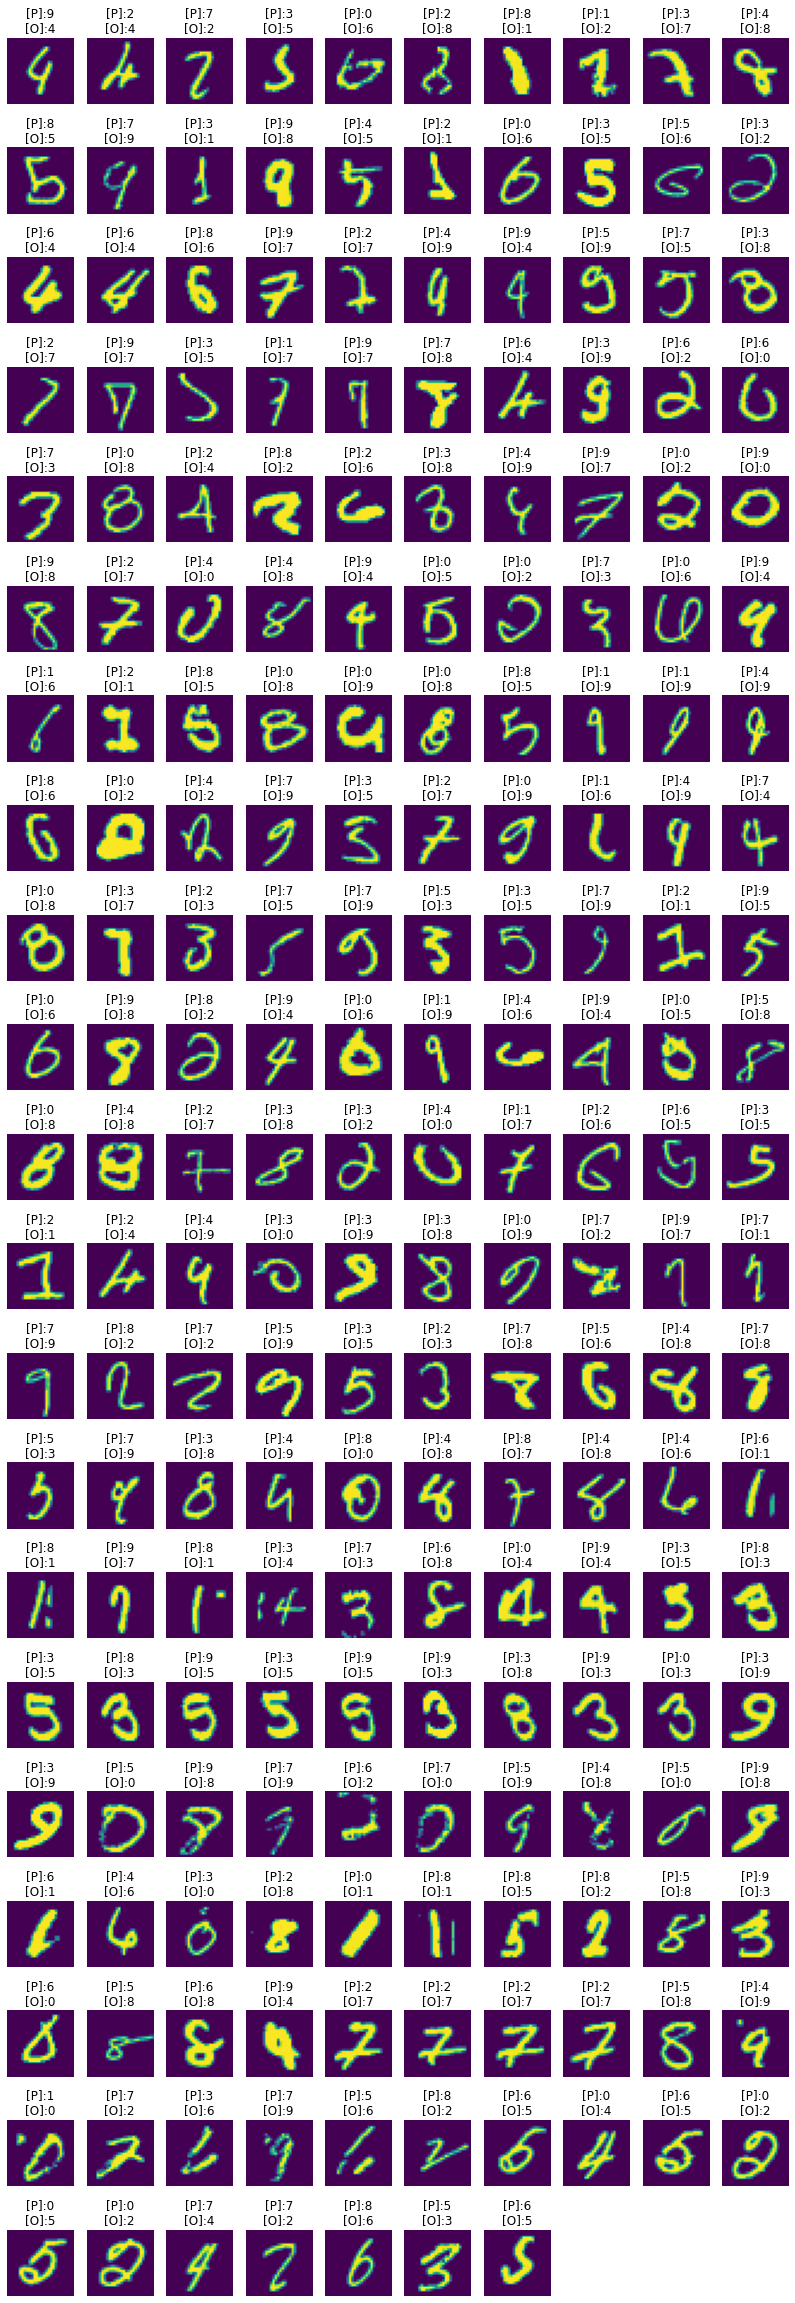

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.nonzero([[0,2,0],  # 判斷第幾個list,第幾個位置zero
      [0,0,3]])
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_label = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14,42))
width = 10
height= len(idx) // width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = "[P]:{}\n[O]:{}".format(false_pre[i], false_label[i])
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i])

In [13]:
import os
from tensorflow.keras.models import load_model

if not os.path.exists("mlp.h5"):
  layers =[
  # 784 * 128(線條) + 128(bias) = 100480
  Dense(256, activation="relu", input_dim=784),
  # 128 * 10(線條) + 10(bias) = 1290
  Dense(10, activation="softmax")
  ]
  model = Sequential(layers)
  model.compile(loss=CategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=["accuracy"])
else:
  # 手動儲存: model.save("mlp.h5")
  # 讀取完不用再 compile, 你可以直接進行預測(evaluate, predict) 或者繼續訓練(fit)
  print("Loading...")
  model = load_model("mlp.h5")
model.summary()

Loading...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
